In [719]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import json
import matplotlib.pyplot as plt#visualization
from collections import Counter
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns #visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

import xgboost as xgb
import catboost as catb
import lightgbm as lgbm
from imblearn.over_sampling import RandomOverSampler, ADASYN, BorderlineSMOTE, SMOTE

from scipy.stats import shapiro, probplot, ttest_ind, mannwhitneyu, chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, scorer, log_loss
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, f1_score, cohen_kappa_score
from sklearn.model_selection import KFold, GridSearchCV

# –ò–Ω—Å—Ç—Ä—É–∫—Ü–∏—è –ø–æ —É—Å—Ç–∞–Ω–æ–≤–∫–µ –ø–∞–∫–µ—Ç–∞: https://github.com/maks-sh/scikit-uplift
# –°—Å—ã–ª–∫–∞ –Ω–∞ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏—é: https://scikit-uplift.readthedocs.io/en/latest/
from sklift.metrics import uplift_at_k
from sklift.viz import plot_uplift_preds
from sklift.models import SoloModel
from sklift.models import ClassTransformation

import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold
from pylab import rcParams

rcParams['figure.figsize'] = 8, 5
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn-whitegrid')

# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ (—á–∞—Å—Ç—å 1)

1. –≤–∑—è—Ç—å –ª—é–±–æ–π –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ (–º–æ–∂–Ω–æ —Å–∫–∞—á–∞—Ç—å –æ–¥–∏–Ω –∏–∑ –º–æ–¥–µ–ª—å–Ω—ã—Ö —Å https://archive.ics.uci.edu/ml/datasets.php)

In [69]:
#—Å–∫–∞—á–∞–ª –¥–∞—Ç–∞—Å–µ—Ç –æ—Ç—Å—é–¥–∞ https://www.kaggle.com/sumanoj23/dataset
df = pd.read_csv("training_g_b_new1.csv")

In [70]:
df.shape

(4102, 21)

In [71]:
df.head()

user_id  target  account_detail_f  pro_cat_f  accessories_f  view_order_f  \
0     8468       0                 1          3              0             0   
1     4884       0                 5         31             13             0   
2     3483       0                 3         24              0             0   
3     9032       0                 6          0              0             0   
4     1268       1                18        129              2            10   

   orders_f  contact_us_f  rewards_f  rewards_cart_f  deli_retrn_f  shop_f  \
0         0             0          0               0             0       0   
1         2             1          4               1             0       6   
2         1             0          0               0             0      19   
3         0             0          0               0             0       0   
4        10             0         26               1             1     172   

   prod_search_f  goalkeeper_f  loyalty_f  prod_coulour_f  clearance_f  \
0              0             0          0               1            0   
1              0             0          0               0            0   
2              0             2          0               4            3   
3              0             0          0               0            0   
4              2             3         21               1            0   

   sale_f  training_wear_f  page_views  sessions  
0       0                0          10         1  
1       1                0          78         6  
2       2                3          86         6  
3       0                0           7         1  
4       0               86         454        25

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4102 entries, 0 to 4101
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   user_id           4102 non-null   int64
 1   target            4102 non-null   int64
 2   account_detail_f  4102 non-null   int64
 3   pro_cat_f         4102 non-null   int64
 4   accessories_f     4102 non-null   int64
 5   view_order_f      4102 non-null   int64
 6   orders_f          4102 non-null   int64
 7   contact_us_f      4102 non-null   int64
 8   rewards_f         4102 non-null   int64
 9   rewards_cart_f    4102 non-null   int64
 10  deli_retrn_f      4102 non-null   int64
 11  shop_f            4102 non-null   int64
 12  prod_search_f     4102 non-null   int64
 13  goalkeeper_f      4102 non-null   int64
 14  loyalty_f         4102 non-null   int64
 15  prod_coulour_f    4102 non-null   int64
 16  clearance_f       4102 non-null   int64
 17  sale_f            4102 non-null  

2. —Å–¥–µ–ª–∞—Ç—å eda (–∫–∞–∫ –Ω–∞ –∑–∞–Ω—è—Ç–∏–∏ 6 —Å –ø—Ä–∏–º–µ—Ä–æ–º –¥–ª—è –æ—Ç—Ç–æ–∫–∞)

In [77]:
#—Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –∏ —Å–ø–∏—Å–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
target = 'target'
feauters = [df.columns[0]] + list(df.columns[2:])
feauters

['user_id',
 'account_detail_f',
 'pro_cat_f',
 'accessories_f',
 'view_order_f',
 'orders_f',
 'contact_us_f',
 'rewards_f',
 'rewards_cart_f',
 'deli_retrn_f',
 'shop_f',
 'prod_search_f',
 'goalkeeper_f',
 'loyalty_f',
 'prod_coulour_f',
 'clearance_f',
 'sale_f',
 'training_wear_f',
 'page_views',
 'sessions']

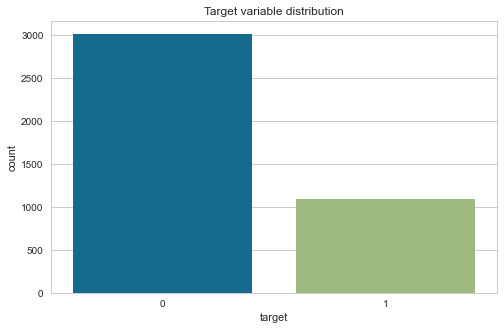

In [78]:
#–ö–æ–ª-–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π –∫–ª–∞—Å—Å–æ–≤:
plt.figure(figsize=(8, 5))

sns.countplot(x=target, data=df)

plt.title('Target variable distribution')
plt.show()

–ü—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –Ω–µ–∫–æ—Ç–æ—Ä—ã–π –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ - –≤–æ–∑–º–æ–∂–Ω–æ, –ø—Ä–∏–¥–µ—Ç—Å—è –∏—Ö –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞—Ç—å

In [79]:
df.corr()

user_id    target  account_detail_f  pro_cat_f  \
user_id           1.000000 -0.140390         -0.145816  -0.156878   
target           -0.140390  1.000000          0.174370   0.217046   
account_detail_f -0.145816  0.174370          1.000000   0.606962   
pro_cat_f        -0.156878  0.217046          0.606962   1.000000   
accessories_f    -0.094564  0.178169          0.501863   0.740534   
view_order_f     -0.097625  0.186133          0.677056   0.469657   
orders_f         -0.081542  0.147250          0.603691   0.488775   
contact_us_f     -0.072630  0.211665          0.401903   0.358368   
rewards_f        -0.120558  0.191514          0.569683   0.628197   
rewards_cart_f   -0.089615  0.179146          0.489398   0.475495   
deli_retrn_f     -0.096184  0.200659          0.260302   0.337830   
shop_f           -0.183808  0.258442          0.625821   0.895629   
prod_search_f    -0.175302  0.242616          0.165042   0.185784   
goalkeeper_f     -0.114805  0.120402          0.394438   0.617239   
loyalty_f        -0.094206  0.167223          0.416268   0.536175   
prod_coulour_f   -0.020920  0.175308          0.536349   0.756347   
clearance_f      -0.125715  0.139872          0.313921   0.517167   
sale_f           -0.152103  0.180615          0.470184   0.616127   
training_wear_f  -0.179506  0.271988          0.534487   0.837325   
page_views       -0.177709  0.219347          0.687221   0.916633   
sessions         -0.190019  0.202387          0.552152   0.726113   

                  accessories_f  view_order_f  orders_f  contact_us_f  \
user_id               -0.094564     -0.097625 -0.081542     -0.072630   
target                 0.178169      0.186133  0.147250      0.211665   
account_detail_f       0.501863      0.677056  0.603691      0.401903   
pro_cat_f              0.740534      0.469657  0.488775      0.358368   
accessories_f          1.000000      0.455842  0.506303      0.291011   
view_order_f           0.455842      1.000000  0.899959      0.282988   
orders_f               0.506303      0.899959  1.000000      0.222706   
contact_us_f           0.291011      0.282988  0.222706      1.000000   
rewards_f              0.609793      0.635455  0.730775      0.260005   
rewards_cart_f         0.426110      0.448589  0.446783      0.216485   
deli_retrn_f           0.267078      0.250069  0.255317      0.259571   
shop_f                 0.681591      0.512621  0.532033      0.409770   
prod_search_f          0.124509      0.133979  0.106788      0.171854   
goalkeeper_f           0.393138      0.334316  0.393986      0.224567   
loyalty_f              0.515265      0.400979  0.419394      0.201185   
prod_coulour_f         0.530525      0.286526  0.275421      0.404690   
clearance_f            0.346942      0.240653  0.202458      0.150277   
sale_f                 0.574202      0.537245  0.576788      0.219922   
training_wear_f        0.652627      0.434142  0.457169      0.316575   
page_views             0.695704      0.540308  0.564981      0.396770   
sessions               0.551897      0.479510  0.499275      0.376988   

                  rewards_f  rewards_cart_f  deli_retrn_f    shop_f  \
user_id           -0.120558       -0.089615     -0.096184 -0.183808   
target             0.191514        0.179146      0.200659  0.258442   
account_detail_f   0.569683        0.489398      0.260302  0.625821   
pro_cat_f          0.628197        0.475495      0.337830  0.895629   
accessories_f      0.609793        0.426110      0.267078  0.681591   
view_order_f       0.635455        0.448589      0.250069  0.512621   
orders_f           0.730775        0.446783      0.255317  0.532033   
contact_us_f       0.260005        0.216485      0.259571  0.409770   
rewards_f          1.000000        0.745466      0.320550  0.676324   
rewards_cart_f     0.745466        1.000000      0.248393  0.524749   
deli_retrn_f       0.320550        0.248393      1.000000  0.372878   
shop_f             0.676324        0.5247

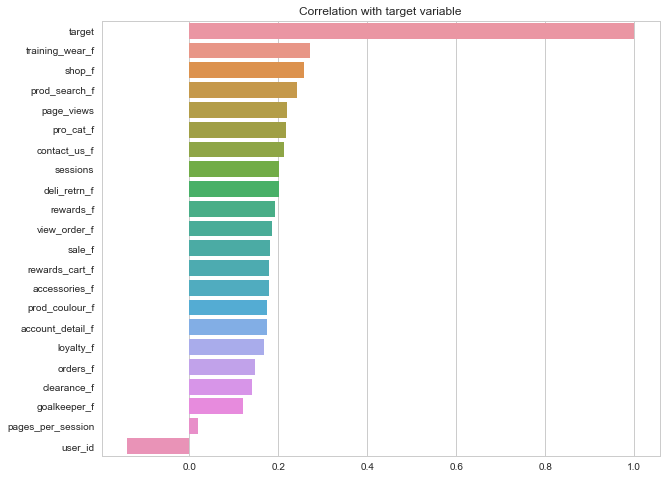

In [108]:
corr_with_target = df.corr().iloc[:, 1].sort_values(ascending=False)
xs = corr_with_target.values
ys = corr_with_target.index

plt.figure(figsize=(10, 8))

sns.barplot(x=xs, y=ys)

plt.title('Correlation with target variable')
plt.show()

–ö–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ:

- training_wear_f
- shop_f
- prod_search_f

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:

In [84]:
def extend_describe_for_num_values(df, col_lst, target_name):
    #–§—É–Ω–∫—Ü–∏—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –¥–æ–ø.–¥–∞–Ω–Ω—ã–µ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º —Å —Ç–∞–±–ª–∏—Ü–æ–π describe: 
    # - –¥–∏—Å–ø–µ—Ä—Å–∏—é
    # - –∫–æ–ª-–≤–æ –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
    # - –∫–æ–ª-–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
    # - –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –ü–∏—Ä—Å–æ–Ω–∞ —Å —Ü–µ–ª–µ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º
    # - p-value –ø–æ —Ç–µ—Å—Ç—É –®–∞–ø–∏—Ä–æ –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
    # - p-value –ø–æ –∫—Ä–∏—Ç–µ—Ä–∏—é –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏ –æ —Ä–∞–≤–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –º–∞—Ç. –æ–∂–∏–¥–∞–π–Ω–∏—è –º–µ–∂–¥—É —Ä–∞–∑–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –∫–ª–∞—Å—Å–æ–≤ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
    
    df_describe = df[col_lst].describe()
    df_desc_add = pd.DataFrame(columns=col_lst)
    for _ in range(5):
        df_desc_add = df_desc_add.append(pd.Series(), ignore_index=True)
    
    
    for v in col_lst:
        df_desc_add[v].iloc[[0]] = np.var(df[v])
        df_desc_add[v].iloc[[1]] = df[df[v].isnull()].shape[0]
        df_desc_add[v].iloc[[2]] = df[v].nunique()
        df_notna = df.loc[df[v].notna()]
        shapiro_p_value = shapiro(df_notna[v])[1]
        df_desc_add[v].iloc[[3]] = shapiro_p_value
        if shapiro_p_value < 0.05:
            v_target_0 = df_notna.loc[df_notna[target_name]==0, v]
            v_target_1 = df_notna.loc[df_notna[target_name]==1, v]
            df_desc_add[v].iloc[[4]] = mannwhitneyu(v_target_0, v_target_1)[1]
    
    df_corr = pd.DataFrame(df[col_lst + [target_name]].corr().iloc[:-1, -1]).T

    df_desc_add.rename(index={0:'var', 1:'null', 2:'nunique', 3:'shapiro p-value', 4:'mannw p-value'}, inplace=True)
    df_corr.rename(index={target_name:'corr'}, inplace=True)
    
    df2 = pd.concat([df_describe, df_desc_add, df_corr])
    
    return df2

In [85]:
extend_describe_for_num_values(df, feauters, target)

user_id account_detail_f    pro_cat_f accessories_f  \
count                   4102             4102         4102          4102   
mean                 5966.07          3.46392      27.0982       1.91078   
std                  1919.21          8.69346      62.0715       9.32262   
min                        1                0            0             0   
25%                   4649.5                0            3             0   
50%                   5853.5                1           10             0   
75%                  7353.75                3        27.75             0   
max                     9325              151         1250           222   
var              3.68245e+06          75.5578      3851.93       86.8901   
null                       0                0            0             0   
nunique                 4035               70          227            62   
shapiro p-value  2.96092e-28                0            0             0   
mannw p-value    1.11585e-32         0.100688  8.11195e-33   2.55849e-65   
corr                -0.14039          0.17437     0.217046      0.178169   

                 view_order_f     orders_f contact_us_f    rewards_f  \
count                    4102         4102         4102         4102   
mean                  0.30863     0.606777     0.204778     0.578498   
std                   2.24956      4.48174     0.771345      3.23788   
min                         0            0            0            0   
25%                         0            0            0            0   
50%                         0            0            0            0   
75%                         0            0            0            0   
max                        86          238           12          122   
var                   5.05931      20.0811     0.594828      10.4813   
null                        0            0            0            0   
nunique                    26           30           12           33   
shapiro p-value             0            0            0            0   
mannw p-value    4.72994e-104  9.13087e-58  3.08259e-43  3.65379e-46   
corr                 0.186133      0.14725     0.211665     0.191514   

                rewards_cart_f deli_retrn_f        shop_f prod_search_f  \
count                     4102         4102          4102          4102   
mean                 0.0958069     0.114578       20.1082      0.471234   
std                   0.627219     0.558708       46.3563       2.19852   
min                          0            0             0             0   
25%                          0            0             3             0   
50%                          0            0             9             0   
75%                          0            0            21             0   
max                         14           14          1011            40   
var                   0.393308     0.312079       2148.39        4.8323   
null                         0            0             0             0   
nunique                     12           10           177            31   
shapiro p-value              0            0             0             0   
mannw p-value      1.21412e-33  9.70011e-65  9.42468e-117   6.08174e-89   
corr                  0.179146     0.200659      0.258442      0.242616   

                goalkeeper_f    loyalty_f prod_coulour_f  clearance_f  \
count                   4102         4102           4102         4102   
mean                 2.70673     0.334959        9.93784     0.423452   
std                  8.99297      2.38941        24.5957       2.5944   
min                        0            0              0            0   
25%                        0            0              0            0   
50%                        0            0              3            0   
75%                        0            0             11            0   
max                      197           59            688          103   
var             

- –í—Å–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ (–ó–Ω–∞—á–µ–Ω–∏–µ –ö—Ä–∏—Ç–µ—Ä–∏—è –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –Ω–∏–∂–µ –ø–æ—Ä–æ–≥–æ–≤–æ–≥–æ ùëù - ùë£ùëéùëôùë¢ùëí<0.05 ).
- –ü–æ –∫—Ä–∏—Ç–µ—Ä–∏—é –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏ –≤–∏–¥–Ω–æ, —á—Ç–æ —Ç–æ–ª—å–∫–æ –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ account_detail_f –∑–Ω–∞—á–µ–Ω–∏—è –º–∞—Ç –æ–∂–∏–¥–∞–Ω–∏—è –¥–ª—è 0 –∏ 1 –∫–ª–∞—Å—Å–∞ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –æ–¥–∏–Ω–∞–∫–æ–≤—ã. –û—Å—Ç–∞–ª—å–Ω—ã–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è

–ü—Ä–æ–≤–µ—Ä–∏–º –≤–∏–∑—É–∞–ª—å–Ω–æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–∞ –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏–π:

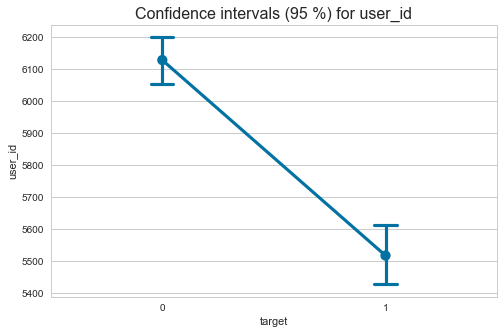

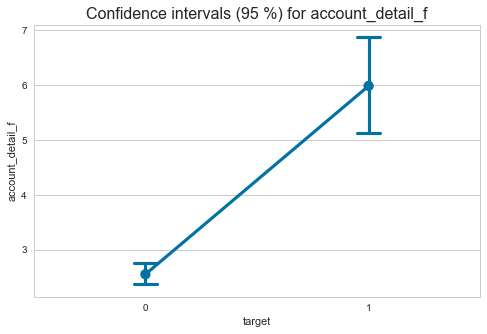

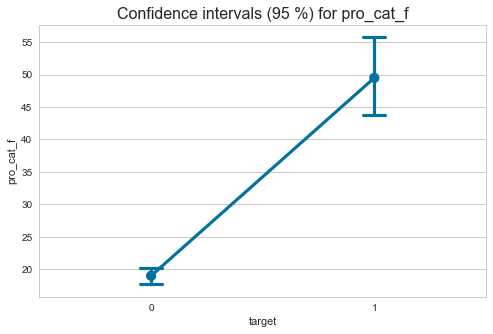

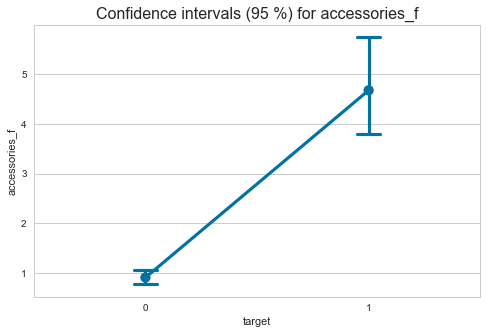

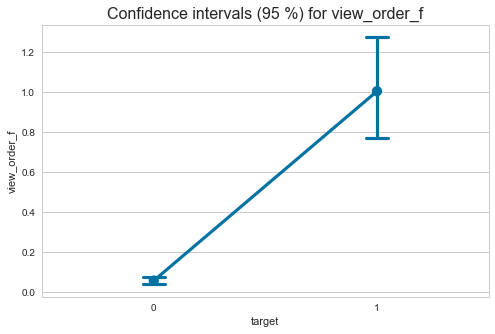

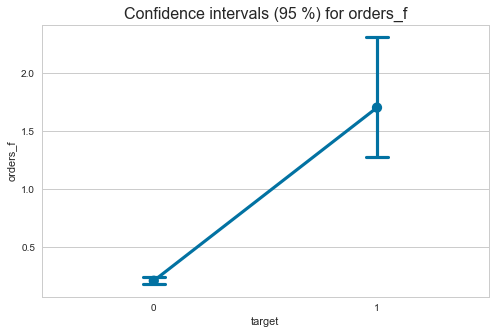

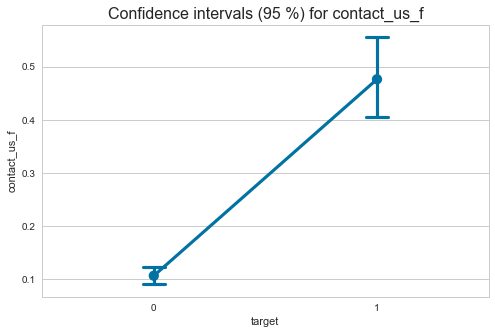

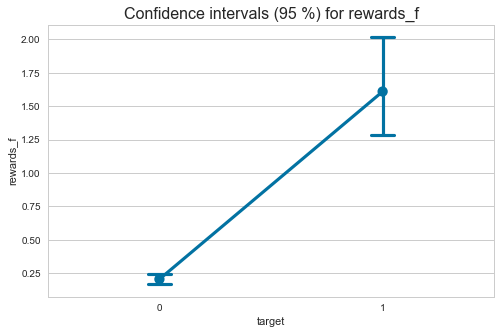

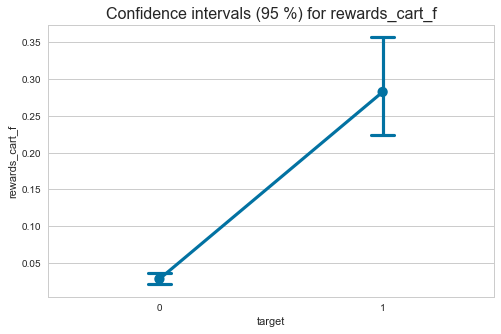

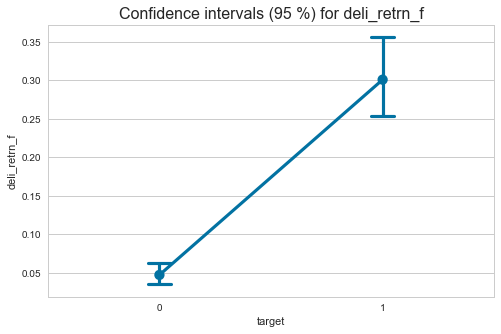

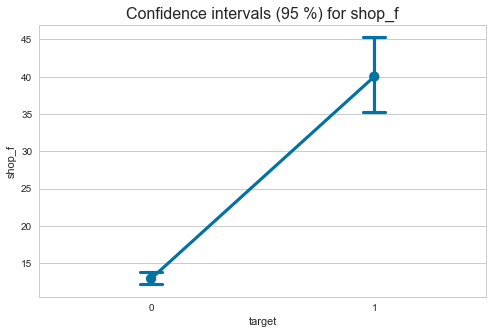

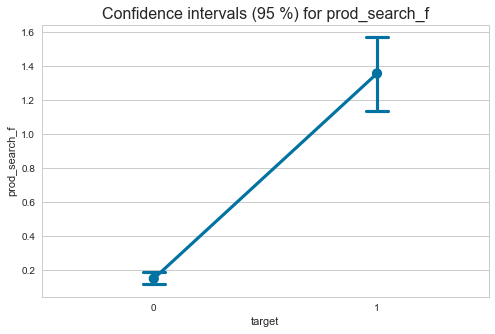

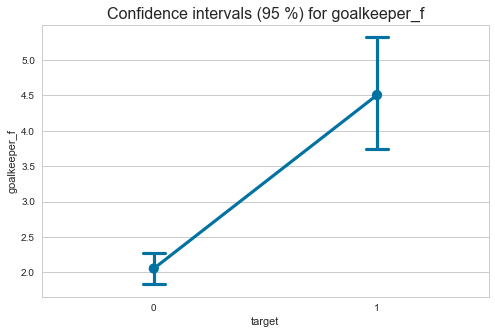

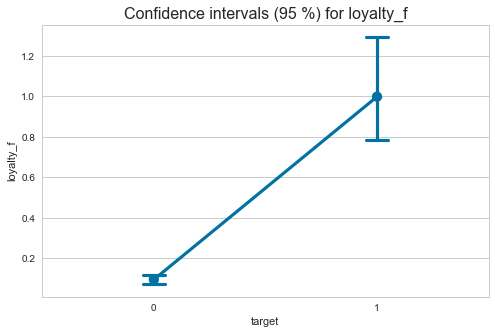

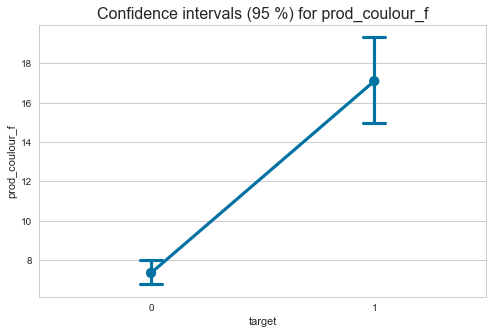

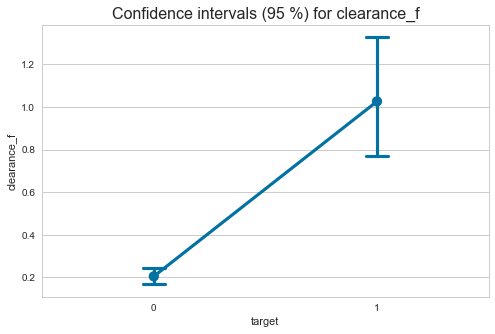

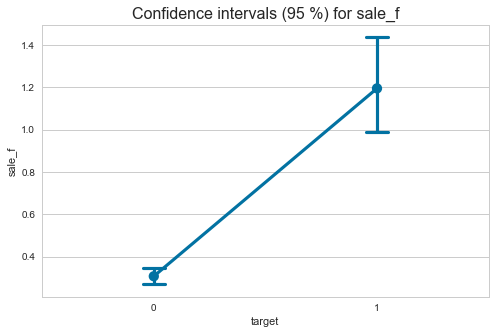

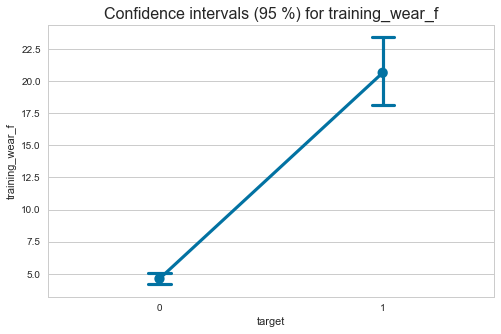

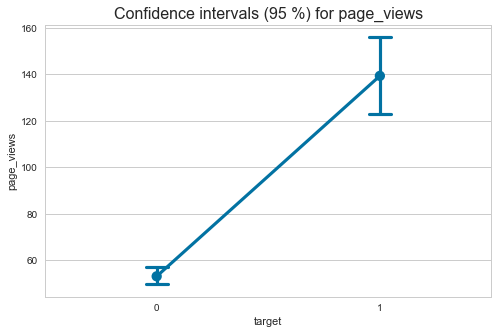

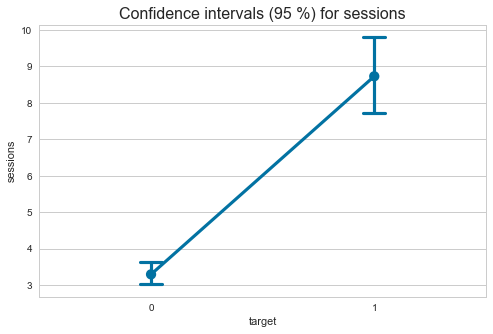

In [86]:
for v in feauters:
    df_v = df.loc[df[v].notna()]
    plt.figure(figsize=(8, 5))

    sns.pointplot(x=target, y=v, data=df_v, capsize=.1)

    plt.title(f'Confidence intervals (95 %) for {v}', fontdict={'fontsize': 16})
    plt.show()

–í–∏–∑—É–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ account_detail_f –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏—è –Ω–µ —Ä–∞–≤–Ω—ã

In [66]:
#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = target1[column],
                          histnorm= "percent",
                          name = "Class 1 Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = target2[column],
                          histnorm = "percent",
                          name = "Class 0 customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [67]:
target1 = df[df[target] == 1]
target2 = df[df[target] == 0]

#for all categorical columns plot histogram    
for i in feauters:
    histogram(i)

3. —Å–¥–µ–ª–∞—Ç—å feature engineering

In [87]:
df.head()

user_id  target  account_detail_f  pro_cat_f  accessories_f  view_order_f  \
0     8468       0                 1          3              0             0   
1     4884       0                 5         31             13             0   
2     3483       0                 3         24              0             0   
3     9032       0                 6          0              0             0   
4     1268       1                18        129              2            10   

   orders_f  contact_us_f  rewards_f  rewards_cart_f  deli_retrn_f  shop_f  \
0         0             0          0               0             0       0   
1         2             1          4               1             0       6   
2         1             0          0               0             0      19   
3         0             0          0               0             0       0   
4        10             0         26               1             1     172   

   prod_search_f  goalkeeper_f  loyalty_f  prod_coulour_f  clearance_f  \
0              0             0          0               1            0   
1              0             0          0               0            0   
2              0             2          0               4            3   
3              0             0          0               0            0   
4              2             3         21               1            0   

   sale_f  training_wear_f  page_views  sessions  
0       0                0          10         1  
1       1                0          78         6  
2       2                3          86         6  
3       0                0           7         1  
4       0               86         454        25

–î–æ–±–∞–≤–∏–º pages_per_session - –∫–æ–ª-–≤–æ —Å—Ç—Ä–∞–Ω–∏—Ü –∑–∞ —Å–µ—Å—Å–∏—é

In [88]:
df['pages_per_session'] = df['page_views'] / df['sessions']

–î–æ–±–∞–≤–∏–º —Å—É–º–º—É —Ä–∞–∑–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –ø—Ä–∏—Ö–æ–¥—è—â—É—é—Å—è –Ω–∞ 1-–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è

In [143]:
agg_feauters = {
    'sessions': 'sum',
    'page_views': 'sum',
    'pro_cat_f': 'sum',
    'goalkeeper_f': 'sum',
    'prod_coulour_f': 'sum',
}
rename_agg_feauters = {
    'sessions': 'sessions_per_user',
    'page_views': 'page_views_per_user',
    'pro_cat_f': 'pro_cat_f_per_user',
    'goalkeeper_f': 'goalkeeper_f_per_user',
    'prod_coulour_f': 'prod_coulour_f_per_user',
}

In [144]:
group_1 = df.groupby('user_id', 
                    as_index=False).agg(agg_feauters).rename(columns=rename_agg_feauters)
df2 = pd.merge(df, group_1, on='user_id', how='left')
df2.head()

user_id  target  account_detail_f  pro_cat_f  accessories_f  view_order_f  \
0     8468       0                 1          3              0             0   
1     4884       0                 5         31             13             0   
2     3483       0                 3         24              0             0   
3     9032       0                 6          0              0             0   
4     1268       1                18        129              2            10   

   orders_f  contact_us_f  rewards_f  rewards_cart_f  deli_retrn_f  shop_f  \
0         0             0          0               0             0       0   
1         2             1          4               1             0       6   
2         1             0          0               0             0      19   
3         0             0          0               0             0       0   
4        10             0         26               1             1     172   

   prod_search_f  goalkeeper_f  loyalty_f  prod_coulour_f  clearance_f  \
0              0             0          0               1            0   
1              0             0          0               0            0   
2              0             2          0               4            3   
3              0             0          0               0            0   
4              2             3         21               1            0   

   sale_f  training_wear_f  page_views  sessions  pages_per_session  \
0       0                0          10         1          10.000000   
1       1                0          78         6          13.000000   
2       2                3          86         6          14.333333   
3       0                0           7         1           7.000000   
4       0               86         454        25          18.160000   

   sessions_per_user  page_views_per_user  pro_cat_f_per_user  \
0                  1                   10                   3   
1                  6                   78                  31   
2                  6                   86                  24   
3                  1                    7                   0   
4                 25                  454                 129   

   goalkeeper_f_per_user  prod_coulour_f_per_user  
0                      0                        1  
1                      0                        0  
2                      2                        4  
3                      0                        0  
4                      3                        1

–£–¥–∞–ª–∏–º –ø—Ä–∏–∑–Ω–∞–∫ user_id, –∫–æ—Ç–æ—Ä—ã–π –º—ã –≤—ã—Ä–∞–∑–∏–ª–∏ —á–µ—Ä–µ–∑ –¥—Ä—É–≥–∏–µ –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [145]:
df2.drop('user_id', axis=1, inplace=True)

In [146]:
#–∏—Ç–æ–≥–æ–≤—ã–π —Å–ø–∏—Å–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
feauters = list(df2.columns[1:])
feauters

['account_detail_f',
 'pro_cat_f',
 'accessories_f',
 'view_order_f',
 'orders_f',
 'contact_us_f',
 'rewards_f',
 'rewards_cart_f',
 'deli_retrn_f',
 'shop_f',
 'prod_search_f',
 'goalkeeper_f',
 'loyalty_f',
 'prod_coulour_f',
 'clearance_f',
 'sale_f',
 'training_wear_f',
 'page_views',
 'sessions',
 'pages_per_session',
 'sessions_per_user',
 'page_views_per_user',
 'pro_cat_f_per_user',
 'goalkeeper_f_per_user',
 'prod_coulour_f_per_user']

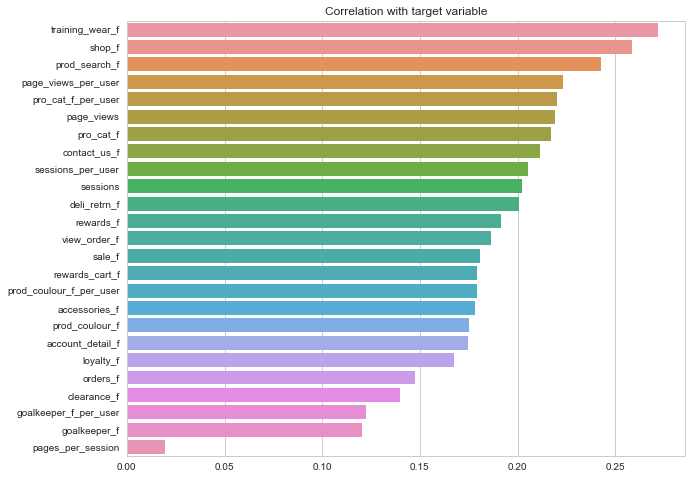

In [147]:
corr_with_target = df2.corr().iloc[1:, 0].sort_values(ascending=False)
xs = corr_with_target.values
ys = corr_with_target.index

plt.figure(figsize=(10, 8))

sns.barplot(x=xs, y=ys)

plt.title('Correlation with target variable')
plt.show()

4. –æ–±—É—á–∏—Ç—å –ª—é–±–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä (–∫–∞–∫–æ–π –≤–∞–º –Ω—Ä–∞–≤–∏—Ç—Å—è)

–ü—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–µ–º Random Forest

In [156]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [157]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 33):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, 1.3, 1, 2])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

In [148]:
y = df2[target]
X = df2.drop(target, axis=1)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [161]:
parameters = {
    'n_estimators': [300, 400, 500],
    'max_features': np.arange(14, 18),
    'max_depth': np.arange(14, 18),
}

clf = GridSearchCV(
    estimator=RandomForestClassifier(criterion='entropy'),
    param_grid=parameters,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

In [162]:
%%time
clf.fit(X_train, y_train)

Wall time: 3min 33s


GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': array([14, 15, 16, 17]),
                         'max_features': array([14, 15, 16, 17]),
                         'n_estimators': [300, 400, 500]},
             scoring='f1')

In [163]:
clf.best_params_

{'max_depth': 17, 'max_features': 15, 'n_estimators': 500}

In [164]:
%%time
model_rfc = RandomForestClassifier(n_estimators = 500,
                                   max_depth = 17,
                                   criterion = 'entropy',
                                   max_features = 15,
                                   random_state = 42
                                  )
model_rfc.fit(X_train, y_train)

Wall time: 4.63 s


RandomForestClassifier(criterion='entropy', max_depth=17, max_features=15,
                       n_estimators=500, random_state=42)

TRAIN

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2260
           1       0.98      0.97      0.98       816

    accuracy                           0.99      3076
   macro avg       0.99      0.98      0.98      3076
weighted avg       0.99      0.99      0.99      3076

TEST

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       752
           1       0.65      0.54      0.59       274

    accuracy                           0.80      1026
   macro avg       0.74      0.72      0.73      1026
weighted avg       0.79      0.80      0.79      1026

CONFUSION MATRIX

col_0     0    1
target          
0       670   82
1       125  149


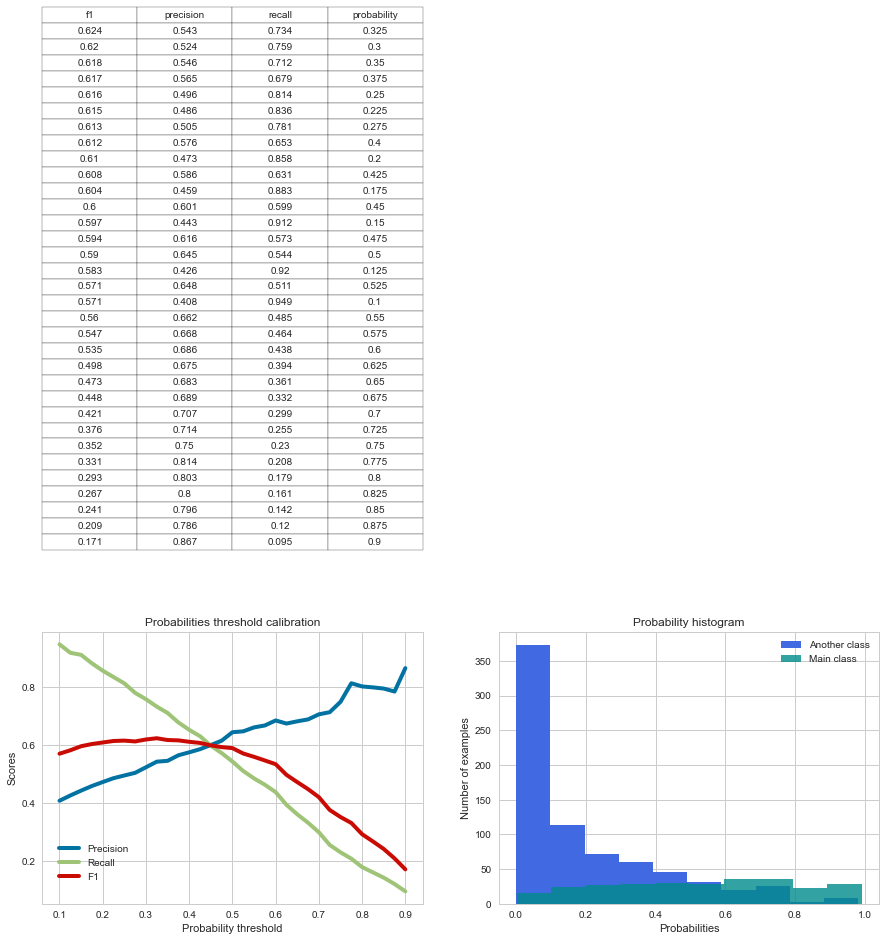

In [165]:
y_train_pred = model_rfc.predict(X_train)
y_test_pred = model_rfc.predict(X_test)
y_test_pred_probs = model_rfc.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

In [166]:
def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 

    
evaluate_results(y_test, y_test_pred)

Classification results:
f1: 59.01%
roc: 71.74%
recall: 54.38%
precision: 64.50%


5. –¥–∞–ª–µ–µ —Ä–∞–∑–¥–µ–ª–∏—Ç—å –≤–∞—à –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –¥–≤–∞ –º–Ω–æ–∂–µ—Å—Ç–≤–∞: P (positives) –∏ U (unlabeled). –ü—Ä–∏—á–µ–º –±—Ä–∞—Ç—å –Ω—É–∂–Ω–æ –Ω–µ –≤—Å–µ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ (–∫–ª–∞—Å—Å 1) –ø—Ä–∏–º–µ—Ä—ã, –∞ —Ç–æ–ª—å–∫–æ –ª–∏—à—å —á–∞—Å—Ç—å

In [190]:
mod_data = df2.copy()
mod_data.head(10)

target  account_detail_f  pro_cat_f  accessories_f  view_order_f  orders_f  \
0       0                 1          3              0             0         0   
1       0                 5         31             13             0         2   
2       0                 3         24              0             0         1   
3       0                 6          0              0             0         0   
4       1                18        129              2            10        10   
5       0                 0         16              0             0         0   
6       1                65        170              3            16        24   
7       0                 3         28             12             0         0   
8       0                 1          8              0             0         0   
9       0                 0         15              0             0         0   

   contact_us_f  rewards_f  rewards_cart_f  deli_retrn_f  shop_f  \
0             0          0               0             0       0   
1             1          4               1             0       6   
2             0          0               0             0      19   
3             0          0               0             0       0   
4             0         26               1             1     172   
5             0          0               0             0      19   
6             2         24               7             1     132   
7             2          5               0             0      37   
8             0          0               0             0       2   
9             0          0               0             0      11   

   prod_search_f  goalkeeper_f  loyalty_f  prod_coulour_f  clearance_f  \
0              0             0          0               1            0   
1              0             0          0               0            0   
2              0             2          0               4            3   
3              0             0          0               0            0   
4              2             3         21               1            0   
5              1             8          0               0            0   
6              5             4          0              46            1   
7              1             3          2               0            0   
8              0             0          0               0            0   
9              0             0          0               6            1   

   sale_f  training_wear_f  page_views  sessions  pages_per_session  \
0       0                0          10         1          10.000000   
1       1                0          78         6          13.000000   
2       2                3          86         6          14.333333   
3       0                0           7         1           7.000000   
4       0               86         454        25          18.160000   
5       0                4          49         1          49.000000   
6       6               66         636        26          24.461538   
7       3                6         696        96           7.250000   
8       0                0          14         1          14.000000   
9       2                1          39         5           7.800000   

   sessions_per_user  page_views_per_user  pro_cat_f_per_user  \
0                  1                   10                   3   
1                  6                   78                  31   
2                  6                   86                  24   
3                  1                    7                   0   
4                 25                  454                 129   
5                  1                   49                  16   
6                 26                  636                 170   
7                 96                  696                  28   
8                  1                   14                   8   
9                  5                   39                  15   

   goalkeeper_f_per_user  prod_coulour_f_per_user

In [191]:
#get the indices of the positives samples
pos_ind = np.where(mod_data[target].values == 1)[0]
#shuffle them
np.random.shuffle(pos_ind)
# leave just 25% of the positives marked
pos_sample_len = int(np.ceil(0.25 * len(pos_ind)))
print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Using 273/1090 as positives and unlabeling the rest


In [192]:
mod_data['class_test'] = -1
mod_data.loc[pos_sample,'class_test'] = 1
print('target variable:\n', mod_data[target].value_counts())

target variable:
 0    3012
1    1090
Name: target, dtype: int64


In [195]:
mod_data['class_test'].value_counts()

-1    3829
 1     273
Name: class_test, dtype: int64

In [200]:
x_data = mod_data[feauters].values # just the X 
y_labeled = mod_data['class_test'].values # new class (just the P & U)
y_positive = mod_data[target].values # original class

6. –ø—Ä–∏–º–µ–Ω–∏—Ç—å random negative sampling –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ –≤ –Ω–æ–≤—ã—Ö —É—Å–ª–æ–≤–∏—è—Ö

In [223]:
mod_data = mod_data.sample(frac=1)
neg_sample = mod_data[mod_data['class_test']==-1][:len(mod_data[mod_data['class_test']==1])*3]
sample_test = mod_data[mod_data['class_test']==-1][len(mod_data[mod_data['class_test']==1])*3:]
pos_sample = mod_data[mod_data['class_test']==1]
print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

(819, 27) (273, 27)


In [228]:
model_rns = xgb.XGBClassifier()

model_rns.fit(sample_train[feauters].values, 
          sample_train[target].values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [229]:
y_predict = model_rns.predict(sample_test[feauters].values)

In [230]:
evaluate_results(sample_test[target].values, y_predict)

Classification results:
f1: 57.64%
roc: 75.30%
recall: 69.98%
precision: 49.00%


7. —Å—Ä–∞–≤–Ω–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ —Å —Ä–µ—à–µ–Ω–∏–µ–º –∏–∑ –ø—É–Ω–∫—Ç–∞ 4 (–ø–æ—Å—Ç—Ä–æ–∏—Ç—å –æ—Ç—á–µ—Ç - —Ç–∞–±–ª–∏—Ü—É –º–µ—Ç—Ä–∏–∫)

In [233]:
%%time
#gives model report in dataframe
def model_report(model, training_x, testing_x, training_y, testing_y,name, cols=None):
    if cols:
        training_x = training_x[cols]
        testing_x = testing_x[cols]
    model.fit(training_x, training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(model_rfc, X_train, X_test, y_train, y_test,
                      "Random Forest Classifier")

model2 = model_report(model_rns, sample_train[feauters].values, sample_test[feauters].values, 
                      sample_train[target].values, sample_test[target].values,
                      "XGB with random negative sampling")

#concat all models
model_performances = pd.concat([model1, model2], axis=0).reset_index()

model_performances = model_performances.drop("index", axis=1)

Wall time: 4.93 s


In [234]:
model_performances

Model  Accuracy_score  Recall_score  Precision  \
0           Random Forest Classifier        0.798246      0.543796   0.645022   
1  XGB with random negative sampling        0.783721      0.699842   0.490044   

   f1_score  Area_under_curve  Kappa_metric  
0  0.590099          0.717377      0.457575  
1  0.576448          0.752950      0.437231

__–ö–∞—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ Random Forest Classifier –±—ã–ª–æ —Å–ª–∞–±—ã–º, –Ω–æ –º–æ–¥–µ–ª—å XGBoost —Å random negative sampling –Ω–µ —Å–∏–ª—å–Ω–æ —É—Ö—É–¥—à–∏–ª–∞—Å—å__ 

# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ (—á–∞—Å—Ç—å 2)

1. –ü—Ä–∏–¥—É–º–∞—Ç—å –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (—É –Ω–∞—Å –∏—Ö –≤—Å–µ–≥–æ 5 –±—ã–ª–æ) - —Å–¥–µ–ª–∞—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π feature engineering

In [548]:
# –ß—Ç–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
df_clients = pd.read_csv('./uplift_data/clients.csv', index_col='client_id')
df_train = pd.read_csv('./uplift_data/uplift_train.csv', index_col='client_id')
df_test = pd.read_csv('./uplift_data/uplift_test.csv', index_col='client_id')

In [475]:
df_train.head()

treatment_flg  target
client_id                        
000012768d              0       1
000036f903              1       1
00010925a5              1       1
0001f552b0              1       1
00020e7b18              1       1

In [476]:
df_clients.head()

first_issue_date    first_redeem_date  age gender
client_id                                                       
000012768d  2017-08-05 15:40:48  2018-01-04 19:30:07   45      U
000036f903  2017-04-10 13:54:23  2017-04-23 12:37:56   72      F
000048b7a6  2018-12-15 13:33:11                  NaN   68      F
000073194a  2017-05-23 12:56:14  2017-11-24 11:18:01   60      F
00007c7133  2017-05-22 16:17:08  2018-12-31 17:17:33   67      U

–ü–æ—á–∏—Å—Ç–∏–º –¥–∞–Ω–Ω—ã–µ:

In [479]:
#–û–±–Ω—É–ª–∏–º –≤–æ–∑—Ä–∞—Å—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –º–ª–∞–¥—à–µ 11 - —Ç–∞–∫–∏—Ö –Ω–µ –æ—á–µ–Ω—å –º–Ω–æ–≥–æ
df_clients.loc[df_clients['age'] < 11].shape

(416, 4)

In [549]:
df_clients.loc[df_clients['age'] < 11, 'age'] = np.nan

In [481]:
#–ò —Ç–∞–∫–∂–µ –æ–±–Ω—É–ª–∏–º –≤–æ–∑—Ä–∞—Å—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å—Ç–∞—Ä—à–µ 110
df_clients.loc[df_clients['age'] > 110].shape

(1032, 4)

In [550]:
df_clients.loc[df_clients['age'] > 110, 'age'] = np.nan

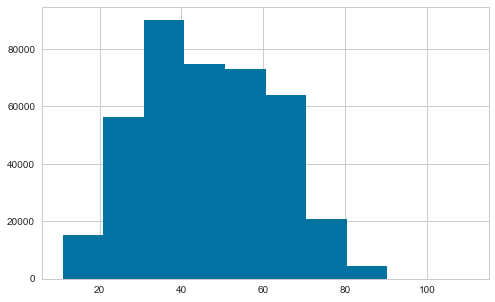

In [483]:
df_clients['age'].hist(bins=10)

–î–æ–±–∞–≤–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∏:
- –¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏
- –¥–µ–Ω—å –º–µ—Å—è—Ü–∞
- –Ω–æ–º–µ—Ä –Ω–µ–¥–µ–ª–∏
- –º–µ—Å—è—Ü
- –≥–æ–¥

In [551]:
df_clients['first_issue_date'] = pd.to_datetime(df_clients['first_issue_date'])
df_clients['first_redeem_date'] = pd.to_datetime(df_clients['first_redeem_date'])

df_clients['first_issue_year'] = df_clients['first_issue_date'].dt.year
df_clients['first_issue_month'] = df_clients['first_issue_date'].dt.month
df_clients['first_issue_week'] = df_clients['first_issue_date'].dt.week
df_clients['first_issue_day'] = df_clients['first_issue_date'].dt.day
df_clients['first_issue_dayofweek'] = df_clients['first_issue_date'].dt.dayofweek

df_clients['first_redeem_year'] = df_clients['first_redeem_date'].dt.year
df_clients['first_redeem_month'] = df_clients['first_redeem_date'].dt.month
df_clients['first_redeem_week'] = df_clients['first_redeem_date'].dt.week
df_clients['first_redeem_day'] = df_clients['first_redeem_date'].dt.day
df_clients['first_redeem_dayofweek'] = df_clients['first_redeem_date'].dt.dayofweek

- –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–µ –≥—Ä—É–ø–ø—ã

In [552]:
bins = [0, 18, 23, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 100, 120]
df_clients['age_group'] = pd.cut(df_clients['age'], bins, labels=bins[1:]).astype('str')

- –∫—É—Ä—Å –¥–æ–ª–ª–∞—Ä–∞ –ø–æ –¥–∞—Ç–∞–º first_issue_date –∏ first_redeem_date

In [553]:
df_clients.reset_index(level=0, inplace=True)
df_clients.head()

client_id    first_issue_date   first_redeem_date   age gender  \
0  000012768d 2017-08-05 15:40:48 2018-01-04 19:30:07  45.0      U   
1  000036f903 2017-04-10 13:54:23 2017-04-23 12:37:56  72.0      F   
2  000048b7a6 2018-12-15 13:33:11                 NaT  68.0      F   
3  000073194a 2017-05-23 12:56:14 2017-11-24 11:18:01  60.0      F   
4  00007c7133 2017-05-22 16:17:08 2018-12-31 17:17:33  67.0      U   

   first_issue_year  first_issue_month  first_issue_week  first_issue_day  \
0              2017                  8                31                5   
1              2017                  4                15               10   
2              2018                 12                50               15   
3              2017                  5                21               23   
4              2017                  5                21               22   

   first_issue_dayofweek  first_redeem_year  first_redeem_month  \
0                      5             2018.0                 1.0   
1                      0             2017.0                 4.0   
2                      5                NaN                 NaN   
3                      1             2017.0                11.0   
4                      0             2018.0                12.0   

   first_redeem_week  first_redeem_day  first_redeem_dayofweek age_group  
0                1.0               4.0                     3.0      45.0  
1               16.0              23.0                     6.0      75.0  
2                NaN               NaN                     NaN      70.0  
3               47.0              24.0                     4.0      60.0  
4                1.0              31.0                     0.0      70.0

In [554]:
with open('./uplift_data/dollar.json') as json_file:
    data = json.load(json_file)

df_dollar = pd.DataFrame(data)
df_dollar['date'] =  pd.to_datetime(df_dollar['date'], format='%Y-%m-%d')
df_dollar = df_dollar.loc[df_dollar['date'] > pd.to_datetime('2016-12-31')]

In [555]:
df_clients['date'] = pd.to_datetime(df_clients['first_issue_date'].dt.date, format='%Y-%m-%d')
df_clients2 = pd.merge(df_clients, df_dollar, on='date', how='inner')

In [556]:
df_clients2['date'] = pd.to_datetime(df_clients2['first_redeem_date'].dt.date, format='%Y-%m-%d')
df_clients3 = pd.merge(df_clients2, df_dollar, on='date', how='left')

In [558]:
df_clients3.shape

(400162, 19)

In [559]:
df_clients3.rename(columns={'value_x':'first_issue_dollar', 'value_y':'first_redeem_dollar'}, inplace=True)
df_clients3.drop('date', axis=1, inplace=True)
df_clients3.set_index('client_id', inplace=True)
df_clients3.head()

first_issue_date   first_redeem_date   age gender  \
client_id                                                         
000012768d 2017-08-05 15:40:48 2018-01-04 19:30:07  45.0      U   
000f064b75 2017-08-05 12:03:12 2017-11-24 14:27:21  29.0      F   
001baafea0 2017-08-05 12:30:45 2018-06-04 15:22:42  62.0      F   
003b78bd6a 2017-08-05 14:30:57 2017-12-28 19:20:18  69.0      U   
006d47ff8a 2017-08-05 13:46:28 2017-09-30 08:47:36  31.0      F   

            first_issue_year  first_issue_month  first_issue_week  \
client_id                                                           
000012768d              2017                  8                31   
000f064b75              2017                  8                31   
001baafea0              2017                  8                31   
003b78bd6a              2017                  8                31   
006d47ff8a              2017                  8                31   

            first_issue_day  first_issue_dayofweek  first_redeem_year  \
client_id                                                               
000012768d                5                      5             2018.0   
000f064b75                5                      5             2017.0   
001baafea0                5                      5             2018.0   
003b78bd6a                5                      5             2017.0   
006d47ff8a                5                      5             2017.0   

            first_redeem_month  first_redeem_week  first_redeem_day  \
client_id                                                             
000012768d                 1.0                1.0               4.0   
000f064b75                11.0               47.0              24.0   
001baafea0                 6.0               23.0               4.0   
003b78bd6a                12.0               52.0              28.0   
006d47ff8a                 9.0               39.0              30.0   

            first_redeem_dayofweek age_group  first_issue_dollar  \
client_id                                                          
000012768d                     3.0      45.0             60.3281   
000f064b75                     4.0      30.0             60.3281   
001baafea0                     0.0      65.0             60.3281   
003b78bd6a                     3.0      70.0             60.3281   
006d47ff8a                     5.0      35.0             60.3281   

            first_redeem_dollar  
client_id                        
000012768d              57.6002  
000f064b75              58.4622  
001baafea0              62.2056  
003b78bd6a              57.4544  
006d47ff8a              58.0169

- –æ—Å–Ω–æ–≤–Ω—ã–µ –ø—Ä–∞–∑–¥–Ω–∏—á–Ω—ã–µ –∏ –ø—Ä–µ–¥–ø—Ä–∞–∑–¥–Ω–∏—á–Ω—ã–µ –¥–Ω–∏ 

In [560]:
holidays_day_of_month = [
    [1, 2, 3, 4, 5, 6, 7, 8],
    [14],
    [8],
    [],
    [1, 2, 3, 8, 9, 10],
    [],
    [],
    [],
    [],
    [],
    [],
    [31]
]
pre_holidays_day_of_month = [
    [],
    [13],
    [5, 6, 7],
    [30],
    [7],
    [],
    [],
    [],
    [],
    [],
    [],
    [25, 26, 27, 28, 29, 30]
]

In [561]:
df_clients3['first_issue_holiday'] = 0
df_clients3['first_issue_preholiday'] = 0
df_clients3['first_redeem_holiday'] = 0
df_clients3['first_redeem_preholiday'] = 0

for m in range(12):
    month = m + 1
    if len(holidays_day_of_month[m]):
        for v in holidays_day_of_month[m]:
            df_clients3.loc[(df_clients3['first_issue_month'] == month) & (df_clients3['first_issue_day'] == v)
                            , 'first_issue_holiday'] = 1
            df_clients3.loc[(df_clients3['first_redeem_month'] == month) & (df_clients3['first_redeem_day'] == v)
                            , 'first_redeem_holiday'] = 1
    
    if len(pre_holidays_day_of_month[m]):
        for v in holidays_day_of_month[m]:
            df_clients3.loc[(df_clients3['first_issue_month'] == month) & (df_clients3['first_issue_day'] == v)
                            , 'first_issue_preholiday'] = 1
            df_clients3.loc[(df_clients3['first_redeem_month'] == month) & (df_clients3['first_redeem_day'] == v)
                            , 'first_redeem_preholiday'] = 1

In [562]:
df_clients3.shape

(400162, 21)

–î–æ–±–∞–≤–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å —É—Ä–æ–∫–∞:

In [563]:
# –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
df_features = df_clients3.copy()
df_features['first_issue_time'] = (df_features['first_issue_date'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')
df_features['first_redeem_time'] = (df_features['first_redeem_date'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')
df_features['issue_redeem_delay'] = df_features['first_redeem_time'] - df_features['first_issue_time']
df_features = df_features.drop(['first_issue_date', 'first_redeem_date'], axis=1)

In [564]:
indices_train = df_train.index
indices_test = df_test.index
indices_learn, indices_valid = train_test_split(df_train.index, 
                                                test_size=0.4, 
                                                random_state=12)

2. –î–ª—è –ø–æ–¥—Ö–æ–¥–æ–≤ —Å –æ–¥–Ω–æ–π –º–æ–¥–µ–ª—å—é –ø–æ–≤–∞—Ä—å–∏—Ä–æ–≤–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã CatBoostClassifier –ª–∏–±–æ –¥–∞–∂–µ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –¥—Ä—É–≥–æ–π –∞–ª–≥–æ—Ä–∏—Ç–º (–æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ —É–∂–µ).

In [739]:
models_results = {
    'approach': [],
    'uplift@30%': [],
    'ctrl_log_loss': [],
    'ctrl_f1_score': [],
    'ctrl_roc_auc': [],
    'ctrl_accuracy': [],
}

In [740]:
X_train = df_features.loc[indices_learn, :]
y_train = df_train.loc[indices_learn, 'target']
treat_train = df_train.loc[indices_learn, 'treatment_flg']

X_val = df_features.loc[indices_valid, :]
y_val = df_train.loc[indices_valid, 'target']
treat_val =  df_train.loc[indices_valid, 'treatment_flg']

X_train_full = df_features.loc[indices_train, :]
y_train_full = df_train.loc[:, 'target']
treat_train_full = df_train.loc[:, 'treatment_flg']

X_test = df_features.loc[indices_test, :]

In [741]:
cat_features = ['gender', 'age_group']

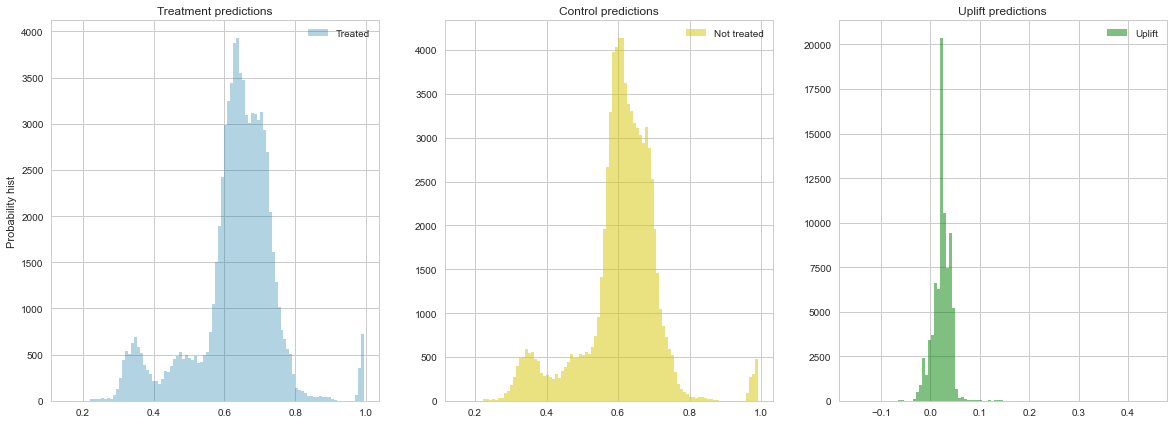

In [742]:
sm_catb = SoloModel(catb.CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
sm_catb = sm_catb.fit(X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_features})

uplift_sm = sm_catb.predict(X_val)

sm_score = uplift_at_k(y_true=y_val, uplift=uplift_sm, treatment=treat_val, strategy='by_group', k=0.3)

# –ü–æ–ª—É—á–∏–º —É—Å–ª–æ–≤–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–≥–æ –¥–µ–π—Å—Ç–≤–∏—è –ø—Ä–∏ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞
sm_trmnt_preds = sm_catb.trmnt_preds_
# –ò —É—Å–ª–æ–≤–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–≥–æ –¥–µ–π—Å—Ç–≤–∏—è –±–µ–∑ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞
sm_ctrl_preds = sm_catb.ctrl_preds_

sm_ctrl_y_pred = [0 if x<0.5 else 1 for x in sm_ctrl_preds]

models_results['approach'].append('SoloModel CatB')
models_results['uplift@30%'].append(sm_score)
models_results['ctrl_log_loss'].append(log_loss(y_val, sm_ctrl_preds))
models_results['ctrl_f1_score'].append(f1_score(y_val, sm_ctrl_y_pred))
models_results['ctrl_roc_auc'].append(roc_auc_score(y_val, sm_ctrl_preds))
models_results['ctrl_accuracy'].append(accuracy_score(y_val, sm_ctrl_y_pred))

# –û—Ç—Ä–∏—Å—É–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –∏ –∏—Ö —Ä–∞–∑–Ω–æ—Å—Ç—å (uplift)
plot_uplift_preds(trmnt_preds=sm_trmnt_preds, ctrl_preds=sm_ctrl_preds);

In [743]:
models_results

{'approach': ['SoloModel CatB'],
 'uplift@30%': [0.041065306968323445],
 'ctrl_log_loss': [0.6372268586826665],
 'ctrl_f1_score': [0.7642299526921985],
 'ctrl_roc_auc': [0.6151256821623747],
 'ctrl_accuracy': [0.6474705058988203]}

In [744]:
#–≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
sm_fi1 = pd.DataFrame({
    'feature_name': sm_catb.estimator.feature_names_,
    'feature_score': sm_catb.estimator.feature_importances_
}).sort_values('feature_score', ascending=False).reset_index(drop=True)

sm_fi1

feature_name  feature_score
0       first_redeem_dollar      31.272396
1         first_redeem_week      22.481867
2         first_redeem_time      15.200357
3        first_redeem_month      10.137632
4        issue_redeem_delay       5.445447
5                       age       4.114131
6          first_issue_time       2.421105
7                    gender       1.500821
8          first_redeem_day       1.475320
9                 treatment       1.457391
10       first_issue_dollar       0.743075
11    first_issue_dayofweek       0.598814
12          first_issue_day       0.521549
13        first_issue_month       0.509563
14   first_redeem_dayofweek       0.456090
15         first_issue_year       0.416826
16  first_redeem_preholiday       0.395642
17   first_issue_preholiday       0.324684
18         first_issue_week       0.299973
19        first_redeem_year       0.227318
20                age_group       0.000000
21      first_issue_holiday       0.000000
22     first_redeem_holiday       0.000000

–£–¥–∞–ª–∏–º —Å–æ–≤—Å–µ–º –Ω–µ –≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ –ø–æ–ø—Ä–æ–±—É–µ–º XGBoost

In [745]:
df_features2 = df_features.drop(['age_group', 'first_issue_holiday', 'first_redeem_holiday'], axis=1)

In [746]:
df_features2 = pd.get_dummies(df_features2)

In [747]:
df_features2.head()

age  first_issue_year  first_issue_month  first_issue_week  \
client_id                                                                 
000012768d  45.0              2017                  8                31   
000f064b75  29.0              2017                  8                31   
001baafea0  62.0              2017                  8                31   
003b78bd6a  69.0              2017                  8                31   
006d47ff8a  31.0              2017                  8                31   

            first_issue_day  first_issue_dayofweek  first_redeem_year  \
client_id                                                               
000012768d                5                      5             2018.0   
000f064b75                5                      5             2017.0   
001baafea0                5                      5             2018.0   
003b78bd6a                5                      5             2017.0   
006d47ff8a                5                      5             2017.0   

            first_redeem_month  first_redeem_week  first_redeem_day  \
client_id                                                             
000012768d                 1.0                1.0               4.0   
000f064b75                11.0               47.0              24.0   
001baafea0                 6.0               23.0               4.0   
003b78bd6a                12.0               52.0              28.0   
006d47ff8a                 9.0               39.0              30.0   

            first_redeem_dayofweek  first_issue_dollar  first_redeem_dollar  \
client_id                                                                     
000012768d                     3.0             60.3281              57.6002   
000f064b75                     4.0             60.3281              58.4622   
001baafea0                     0.0             60.3281              62.2056   
003b78bd6a                     3.0             60.3281              57.4544   
006d47ff8a                     5.0             60.3281              58.0169   

            first_issue_preholiday  first_redeem_preholiday  first_issue_time  \
client_id                                                                       
000012768d                       0                        0        1501947648   
000f064b75                       0                        0        1501934592   
001baafea0                       0                        0        1501936245   
003b78bd6a                       0                        0        1501943457   
006d47ff8a                       0                        0        1501940788   

            first_redeem_time  issue_redeem_delay  gender_F  gender_M  \
client_id                                                               
000012768d       1.515094e+09          13146559.0         0         0   
000f064b75       1.511534e+09           9599049.0         1         0   
001baafea0       1.528126e+09          26189517.0         1         0   
003b78bd6a       1.514489e+09          12545361.0         0         0   
006d47ff8a       1.506761e+09           4820468.0         1         0   

            gender_U  
client_id             
000012768d         1  
000f064b75         0  
001baafea0         0  
003b78bd6a         1  
006d47ff8a         0

In [748]:
X_train = df_features2.loc[indices_learn, :]
y_train = df_train.loc[indices_learn, 'target']
treat_train = df_train.loc[indices_learn, 'treatment_flg']

X_val = df_features2.loc[indices_valid, :]
y_val = df_train.loc[indices_valid, 'target']
treat_val =  df_train.loc[indices_valid, 'treatment_flg']

X_train_full = df_features2.loc[indices_train, :]
y_train_full = df_train.loc[:, 'target']
treat_train_full = df_train.loc[:, 'treatment_flg']

X_test = df_features2.loc[indices_test, :]

Wall time: 3min 24s


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019303ED0848>,
      dtype=object)

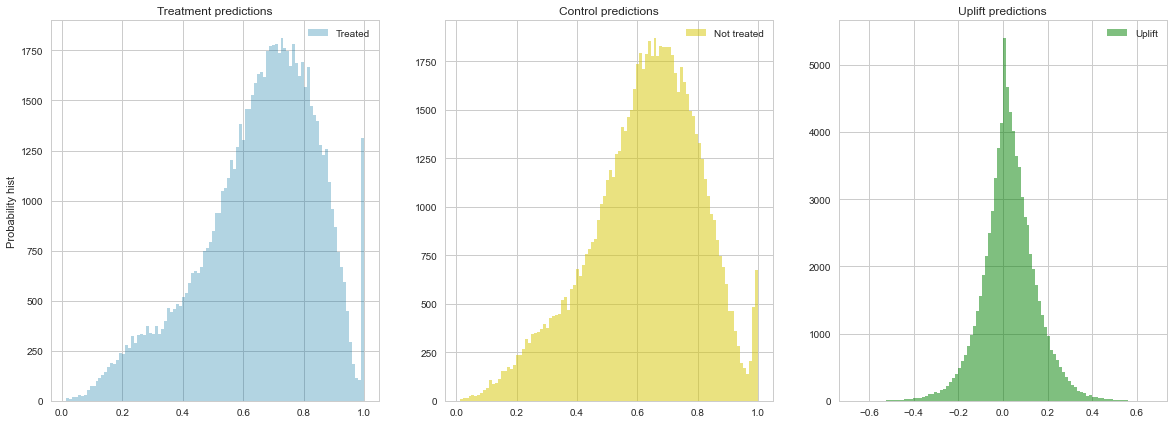

In [749]:
%%time
sm_xgb = SoloModel(xgb.XGBClassifier(n_estimators=400, max_depth=20,
                                 learning_rate=0.05, random_state=42))
sm_xgb = sm_xgb.fit(X_train, y_train, treat_train)

uplift_sm = sm_xgb.predict(X_val)

sm_score = uplift_at_k(y_true=y_val, uplift=uplift_sm, treatment=treat_val, strategy='by_group', k=0.3)

# –ü–æ–ª—É—á–∏–º —É—Å–ª–æ–≤–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–≥–æ –¥–µ–π—Å—Ç–≤–∏—è –ø—Ä–∏ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞
sm_trmnt_preds = sm_xgb.trmnt_preds_
# –ò —É—Å–ª–æ–≤–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–≥–æ –¥–µ–π—Å—Ç–≤–∏—è –±–µ–∑ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞
sm_ctrl_preds = sm_xgb.ctrl_preds_

sm_ctrl_y_pred = [0 if x<0.5 else 1 for x in sm_ctrl_preds]

models_results['approach'].append('SoloModel XGB')
models_results['uplift@30%'].append(sm_score)
models_results['ctrl_log_loss'].append(log_loss(y_val, sm_ctrl_preds))
models_results['ctrl_f1_score'].append(f1_score(y_val, sm_ctrl_y_pred))
models_results['ctrl_roc_auc'].append(roc_auc_score(y_val, sm_ctrl_preds))
models_results['ctrl_accuracy'].append(accuracy_score(y_val, sm_ctrl_y_pred))

# –û—Ç—Ä–∏—Å—É–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –∏ –∏—Ö —Ä–∞–∑–Ω–æ—Å—Ç—å (uplift)
plot_uplift_preds(trmnt_preds=sm_trmnt_preds, ctrl_preds=sm_ctrl_preds);

In [750]:
models_results

{'approach': ['SoloModel CatB', 'SoloModel XGB'],
 'uplift@30%': [0.041065306968323445, 0.02235046082618508],
 'ctrl_log_loss': [0.6372268586826665, 0.6846146447872813],
 'ctrl_f1_score': [0.7642299526921985, 0.71966256842861],
 'ctrl_roc_auc': [0.6151256821623747, 0.579514840850421],
 'ctrl_accuracy': [0.6474705058988203, 0.6096030793841232]}

In [751]:
#–≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
sm_fi = pd.DataFrame({
    'feature_name': sm_xgb.estimator.get_booster().feature_names,
    'feature_score': sm_xgb.estimator.feature_importances_
}).sort_values('feature_score', ascending=False).reset_index(drop=True)

sm_fi

feature_name  feature_score
0         first_redeem_time       0.077225
1   first_redeem_preholiday       0.057094
2        issue_redeem_delay       0.052432
3       first_redeem_dollar       0.051315
4    first_issue_preholiday       0.050485
5          first_issue_time       0.048735
6        first_issue_dollar       0.047768
7                  gender_M       0.047279
8         first_redeem_week       0.047118
9          first_issue_week       0.046437
10                      age       0.046307
11          first_issue_day       0.045716
12         first_redeem_day       0.045682
13   first_redeem_dayofweek       0.044944
14    first_issue_dayofweek       0.043746
15                treatment       0.041454
16                 gender_F       0.040220
17                 gender_U       0.040029
18       first_redeem_month       0.038472
19        first_issue_month       0.037405
20         first_issue_year       0.025162
21        first_redeem_year       0.024975

–ú–æ–¥–µ–ª—å —Å —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –∫–ª–∞—Å—Å–æ–≤

In [752]:
top20_feauters_name = sm_fi1.head(20)['feature_name'].to_list()
top20_feauters_name.remove('treatment')
cat_features = ['gender']

In [753]:
X_train = df_features[top20_feauters_name].loc[indices_learn, :]
y_train = df_train.loc[indices_learn, 'target']
treat_train = df_train.loc[indices_learn, 'treatment_flg']

X_val = df_features[top20_feauters_name].loc[indices_valid, :]
y_val = df_train.loc[indices_valid, 'target']
treat_val =  df_train.loc[indices_valid, 'treatment_flg']

X_train_full = df_features[top20_feauters_name].loc[indices_train, :]
y_train_full = df_train.loc[:, 'target']
treat_train_full = df_train.loc[:, 'treatment_flg']

X_test = df_features[top20_feauters_name].loc[indices_test, :]

–ü–æ–¥–æ–±—Ä–∞–ª –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –ø–æ–∫–∞–∑—ã–≤–∞—é—â–∏–µ –Ω–∞–∏–±–æ–ª—å—à–∏–π –∞–ø–ª–∏—Ñ—Ç —Å –¢–û–ü20 –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –ø–æ –º–æ–¥–µ–ª–∏ –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –º–µ—Ç–æ–¥–∞

In [754]:
%%time
ct = ClassTransformation(catb.CatBoostClassifier(
    iterations=5, 
    thread_count=2, 
    learning_rate=0.5, 
    l2_leaf_reg=3,
    loss_function='CrossEntropy',
    random_state=42, 
    silent=True
))
ct = ct.fit(X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_features})

uplift_ct = ct.predict(X_val)

ct_score = uplift_at_k(y_true=y_val, uplift=uplift_ct, treatment=treat_val, strategy='by_group', k=0.3)

models_results['approach'].append('ClassTransformation CatB')
models_results['uplift@30%'].append(ct_score)
models_results['ctrl_log_loss'].append('-')
models_results['ctrl_f1_score'].append('-')
models_results['ctrl_roc_auc'].append('-')
models_results['ctrl_accuracy'].append('-')

Wall time: 358 ms


In [755]:
models_results

{'approach': ['SoloModel CatB', 'SoloModel XGB', 'ClassTransformation CatB'],
 'uplift@30%': [0.041065306968323445,
  0.02235046082618508,
  0.062286698447055144],
 'ctrl_log_loss': [0.6372268586826665, 0.6846146447872813, '-'],
 'ctrl_f1_score': [0.7642299526921985, 0.71966256842861, '-'],
 'ctrl_roc_auc': [0.6151256821623747, 0.579514840850421, '-'],
 'ctrl_accuracy': [0.6474705058988203, 0.6096030793841232, '-']}

In [704]:
pd.DataFrame({
    'feature_name': ct.estimator.feature_names_,
    'feature_score': ct.estimator.feature_importances_
}).sort_values('feature_score', ascending=False).reset_index(drop=True)

feature_name  feature_score
0         first_redeem_time      31.589894
1        first_redeem_month      24.796242
2          first_redeem_day      14.921686
3    first_redeem_dayofweek       8.450034
4         first_redeem_week       6.214532
5         first_issue_month       3.358664
6                       age       3.357834
7          first_issue_time       2.388034
8           first_issue_day       1.332955
9     first_issue_dayofweek       1.116354
10       first_issue_dollar       0.999514
11        first_redeem_year       0.716017
12      first_redeem_dollar       0.282823
13         first_issue_week       0.259930
14       issue_redeem_delay       0.215487
15                   gender       0.000000
16         first_issue_year       0.000000
17  first_redeem_preholiday       0.000000
18   first_issue_preholiday       0.000000

3. –î–ª—è –ø—É–Ω–∫—Ç–∞ 2 (–ø–æ–¥—Ö–æ–¥–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ –æ–¥–Ω–æ–π –º–æ–¥–µ–ª–∏) –≤—ã–≤–µ—Å—Ç–∏ –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –æ—Å–Ω–æ–≤—ã–≤–∞—è—Å—å –Ω–∞ 
model.estimator.feature_importances_ –∏ model.estimator.feature_names_.

–í—ã–≤–µ–ª –≤—ã—à–µ

4. –î–æ–ø–æ–ª–Ω–∏—Ç—å models_results –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º–∏ –º–µ—Ç—Ä–∏–∫–∞–º–∏ (roc auc, logloss, f1). –í –∫–æ–Ω—Ü–µ –≤—ã–≤–µ—Å—Ç–∏ —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É –≤—Å–µ—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π –¥–ª—è –≤—Å–µ—Ö –ø–æ–¥—Ö–æ–¥–æ–≤ (–∫–∞–∫ –Ω–∞ –æ—Å–Ω–æ–≤–µ

In [761]:
pd.DataFrame(models_results).sort_values(by='uplift@30%', ascending=False)

approach  uplift@30% ctrl_log_loss ctrl_f1_score  \
2  ClassTransformation CatB    0.062287             -             -   
0            SoloModel CatB    0.041065      0.637227       0.76423   
1             SoloModel XGB    0.022350      0.684615      0.719663   

  ctrl_roc_auc ctrl_accuracy  
2            -             -  
0     0.615126      0.647471  
1     0.579515      0.609603

#### –ù–∞–∏–ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ–∫–∞–∑–∞–ª–∞ –º–æ–¥–µ–ª—å ClassTransformation —Å CatBoost, –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∏ –¢–û–ü20 —Ñ–∏—á–∞–º–∏, –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–º–∏ –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–µ–π –º–æ–¥–µ–ª–∏. –ù–æ –ø–æ –Ω–µ–π —è –Ω–µ —Å–º–æ–≥ —Å–æ–±—Ä–∞—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏, –ø–æ—Å–∫–æ–ª—å–∫—É –º–æ–¥–µ–ª—å –≤—ã–¥–∞–µ—Ç —Ç–æ–ª—å–∫–æ –∑–Ω–∞—á–µ–Ω–∏–µ –∞–ø–ª–∏—Ñ—Ç–∞.
#### –¢–∞–∫–∂–µ –Ω–µ –¥–æ –∫–æ–Ω—Ü–∞ –º–Ω–µ –ø–æ–Ω—è—Ç–Ω–æ, –ø–æ –∫–∞–∫–æ–º—É –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é —Å–æ–±–∏—Ä–∞—Ç—å –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ - –ø–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º –Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è—Ö, —Å –∫–∞–∫–∏–º–∏ –Ω–µ –±—ã–ª–æ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ, –∏–ª–∏ –ø–æ —Ç–µ–º, —Å –∫–µ–º –±—ã–ª–æ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ?  